In [37]:
import pandas as pd

disease = pd.read_csv('/Users/sihoon/Downloads/IA_report_dy.csv')

normal = pd.read_csv('/Users/sihoon/Downloads/IA_report_nor.csv')


In [38]:
disease = disease.drop(columns=['Group'])
Disease_Count = disease['SubjectID'].value_counts()
disease['Count'] = disease['SubjectID'].map(Disease_Count)

#disease = disease[disease['SubjectID'] != 'eki26']

normal = normal.drop(columns=['Group'])
Nomal_Count = normal['SubjectID'].value_counts()
normal['Count'] = normal['SubjectID'].map(Nomal_Count)

In [39]:
disease['Count'].value_counts()

Count
193    1351
189    1134
187    1122
196     980
191     573
190     570
182     546
179     537
203     406
198     396
188     376
185     370
184     368
183     366
169     338
197     197
194     194
192     192
186     186
181     181
178     178
177     177
174     174
167     167
166     166
164     164
161     161
152     152
144     144
141     141
139     139
110     110
95       95
90       90
88       88
84       84
28       28
Name: count, dtype: int64

In [40]:
normal['Count'].value_counts()

Count
180    2160
179    2148
181    1991
191    1910
171    1539
190    1520
188    1504
184    1288
182    1274
176    1232
169    1183
187    1122
183    1098
177    1062
175    1050
173    1038
195     975
193     965
189     945
185     925
178     890
172     860
194     776
186     744
174     696
198     594
196     588
192     576
168     504
163     489
197     394
160     320
208     208
207     207
205     205
199     199
170     170
167     167
166     166
164     164
161     161
159     159
157     157
153     153
152     152
151     151
150     150
146     146
145     145
144     144
137     137
132     132
124     124
117     117
105     105
96       96
Name: count, dtype: int64

In [41]:
disease_temp = disease.set_index('SubjectID')
normal_temp = normal.set_index('SubjectID')

disease_SubjectID = disease['SubjectID']
normal_SubjectID = normal['SubjectID']

In [42]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

# 데이터 정규화
disease_scale = standard_scaler.fit_transform(disease_temp)
normal_scale = standard_scaler.fit_transform(normal_temp)

In [43]:
# 컬럼 삽입

disease_scale = pd.DataFrame(disease_scale, columns=disease.columns[1:])
disease_scale = disease_scale.join(disease_SubjectID, how='outer')

normal_scale = pd.DataFrame(normal_scale, columns=disease.columns[1:])
normal_scale = normal_scale.join(normal_SubjectID, how='outer')

# 컬럼을 인덱스화
disease_scale.set_index('SubjectID', inplace=True)
normal.set_index('SubjectID', inplace=True)

# 스케일링 된 disease
disease_scale

,Sentence_ID,Word_Number,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION,Count
SubjectID,,,,,,,,,,,,,,,,
ake05,-1.638298,-1.362834,1.577899,-0.055102,-0.241202,-0.091648,0.472962,-1.601718,1.605918,-0.530104,-0.455851,2.135164,2.120398,1.874738,-0.296007,0.477239
ake05,-1.638298,-0.867247,1.577899,-0.607482,-0.241202,-0.602507,-0.582148,-1.338113,1.528236,-0.741945,-0.236841,-0.468348,2.120398,1.874738,-0.202493,0.477239
ake05,-1.638298,-0.371661,1.577899,-0.331292,-0.241202,0.429200,3.682666,-1.049472,1.455732,1.020094,-0.096450,-0.468348,-0.471610,-0.533408,0.231202,0.477239
ake05,-1.638298,0.123926,1.577899,1.325846,-0.241202,2.316382,2.065488,-0.494364,1.580024,0.474654,-0.377232,-0.468348,-0.471610,-0.533408,1.493163,0.477239
ake05,-1.638298,0.619513,1.577899,-0.883671,-0.241202,-0.585384,1.182943,0.352246,1.709495,-0.387557,0.049557,-0.468348,-0.471610,-0.533408,-0.447251,0.477239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zrs09,1.626620,0.619513,1.577899,0.221087,-0.241202,0.078876,-0.306044,0.547177,1.616276,-0.341031,0.875056,-0.468348,2.120398,1.874738,0.526057,-0.907789
zrs09,1.743225,-0.867247,-0.676166,-0.883671,-0.241202,-0.866499,-0.759643,-0.969353,0.352639,-0.777581,-0.394079,-0.468348,-0.471610,-0.533408,-0.635233,-0.907789
zrs09,1.743225,-0.371661,-0.676166,-0.331292,-0.241202,-0.471939,-0.473678,-0.190700,1.253757,-0.720167,0.936828,2.135164,-0.471610,-0.533408,-0.607561,-0.907789


In [44]:
disease_scale['Count'].value_counts()

Count
 0.521918    1351
 0.343204    1134
 0.253848    1122
 0.655953     980
 0.432561     573
 0.387883     570
 0.030456     546
-0.103579     537
 0.968701     406
 0.745309     396
 0.298526     376
 0.164491     370
 0.119813     368
 0.075134     366
-0.550363     338
 0.700631     197
 0.566596     194
 0.477239     192
 0.209169     186
-0.014222     181
-0.148257     178
-0.192936     177
-0.326971     174
-0.639719     167
-0.684398     166
-0.773754     164
-0.907789     161
-1.309894     152
-1.667321     144
-1.801356     141
-1.890713     139
-3.186385     110
-3.856560      95
-4.079952      90
-4.169308      88
-4.348022      84
-6.850009      28
Name: count, dtype: int64

In [45]:
normal_scale['Count'].value_counts()

Count
-0.003266    2160
-0.076373    2148
 0.069841    1991
 0.800914    1910
-0.661232    1539
 0.727807    1520
 0.581592    1504
 0.289163    1288
 0.142949    1274
-0.295695    1232
-0.807446    1183
 0.508485    1122
 0.216056    1098
-0.222588    1062
-0.368803    1050
-0.515017    1038
 1.093344     975
 0.947129     965
 0.654700     945
 0.362270     925
-0.149481     890
-0.588125     860
 1.020236     776
 0.435378     744
-0.441910     696
 1.312665     594
 1.166451     588
 0.874022     576
-0.880554     504
-1.246090     489
 1.239558     394
-1.465412     320
 2.043738     208
 1.970631     207
 1.824417     205
 1.385773     199
-0.734339     170
-0.953661     167
-1.026768     166
-1.172983     164
-1.392305     161
-1.538519     159
-1.684734     157
-1.977163     153
-2.050271     152
-2.123378     151
-2.196485     150
-2.488914     146
-2.562022     145
-2.635129     144
-3.146880     137
-3.512417     132
-4.097275     124
-4.609026     117
-5.486314     105
-6.1

In [46]:
disease_df = pd.DataFrame(disease_scale)
normal_df = pd.DataFrame(normal_scale)

# groupby로 그룹핑
disease_df = disease_df.groupby(['SubjectID', 'Sentence_ID', 'Word_Number']).mean()
normal_df = normal_df.groupby(['SubjectID', 'Sentence_ID', 'Word_Number']).mean()

disease_df

QUESTION_ACCURACY  FIXATION_COUNT  \
SubjectID Sentence_ID Word_Number                                      
ake05     -1.638298   -1.362834             1.577899       -0.055102   
                      -0.867247             1.577899       -0.607482   
                      -0.371661             1.577899       -0.331292   
                       0.123926             1.577899        1.325846   
                       0.619513             1.577899       -0.883671   
...                                              ...             ...   
zrs09      1.626620    0.619513             1.577899        0.221087   
           1.743225   -0.867247            -0.676166       -0.883671   
                      -0.371661            -0.676166       -0.331292   
                       0.123926            -0.676166        0.773466   
                       0.619513            -0.676166       -0.883671   

                                       SKIP  TOTAL_READING_TIME  \
SubjectID Sentence_ID Word_Number                                 
ake05     -1.638298   -1.362834   -0.241202           -0.091648   
                      -0.867247   -0.241202           -0.602507   
                      -0.371661   -0.241202            0.429200   
                       0.123926   -0.241202            2.316382   
                       0.619513   -0.241202           -0.585384   
...                                     ...                 ...   
zrs09      1.626620    0.619513   -0.241202            0.078876   
           1.743225   -0.867247   -0.241202           -0.866499   
                      -0.371661   -0.241202           -0.471939   
                       0.123926   -0.241202            0.060325   
                       0.619513   -0.241202           -0.857937   

                                   FIRST_FIXATION_DURATION  FIRST_FIXATION_X  \
SubjectID Sentence_ID Word_Number                                              
ake05     -1.638298   -1.362834                   0.472962         -1.601718   
                      -0.867247                  -0.582148         -1.338113   
                      -0.371661                   3.682666         -1.049472   
                       0.123926                   2.065488         -0.494364   
                       0.619513                   1.182943          0.352246   
...                                                    ...               ...   
zrs09      1.626620    0.619513                  -0.306044          0.547177   
           1.743225   -0.867247                  -0.759643         -0.969353   
                      -0.371661                  -0.473678         -0.190700   
                       0.123926                  -0.261670          0.375137   
                       0.619513                  -0.700478          1.210302   

                                   FIRST_FIXATION_Y  \
SubjectID Sentence_ID Word_Number                     
ake05     -1.638298   -1.362834            1.605918   
                      -0.867247            1.528236   
                      -0.371661            1.455732   
                       0.123926            1.580024   
                       0.619513            1.709495   
...                                             ...   
zrs09      1.626620    0.619513            1.616276   
           1.743225   -0.867247            0.352639   
                      -0.371661            1.253757   
                       0.123926            1.088034   
                       0.619513            0.720337   

                                   FIRST_RUN_TOTAL_READING_TIME  \
SubjectID Sentence_ID Word_Number                                 
ake05     -1.638298   -1.362834                       -0.530104   
                      -0.867247                       -0.741945   
                      -0.371661                        1.020094   
                       0.123926                        0.474654   
                       0.619513                       -0.387557   


In [47]:
disease_df.describe()

,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION,Count
count,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04,1.264100e+04
mean,5.171263e-17,-1.349025e-16,6.745125e-18,4.721588e-17,-7.644475e-17,-1.115756e-16,-6.205515e-16,-5.396100e-17,-1.034253e-16,-1.011769e-16,1.517653e-17,7.756894e-17,2.023538e-17,-4.047075e-16
std,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00,1.000040e+00
min,-6.761660e-01,-8.836714e-01,-2.412021e-01,-9.692415e-01,-1.489345e+00,-1.897513e+00,-2.676982e+00,-9.240880e-01,-9.668737e-01,-4.683480e-01,-4.716096e-01,-5.334078e-01,-6.972580e-01,-6.850009e+00
25%,-6.761660e-01,-6.074818e-01,-2.412021e-01,-6.253391e-01,-6.708952e-01,-8.717085e-01,-6.624133e-01,-6.261253e-01,-4.783132e-01,-4.683480e-01,-4.716096e-01,-5.334078e-01,-4.906685e-01,-1.422242e-02
50%,-6.761660e-01,-3.312921e-01,-2.412021e-01,-3.128303e-01,-2.863224e-01,-3.618607e-02,2.637230e-02,-3.400415e-01,-1.863000e-01,-4.683480e-01,-4.716096e-01,-5.334078e-01,-2.812163e-01,2.985260e-01
75%,1.577899e+00,2.210872e-01,-2.412021e-01,2.757993e-01,3.940756e-01,7.957596e-01,6.944425e-01,2.489546e-01,1.955633e-01,-4.683480e-01,-4.716096e-01,-5.334078e-01,1.405507e-01,5.219177e-01
max,1.577899e+00,1.209724e+01,4.145900e+00,1.242940e+01,1.525436e+01,2.667816e+00,2.237737e+00,1.139929e+01,1.666061e+01,2.135164e+00,2.120398e+00,1.874738e+00,2.141307e+01,9.687011e-01


In [48]:
normal_df.describe()

,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION,Count
count,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04,3.807500e+04
mean,2.202076e-17,-3.284452e-17,-2.724602e-17,4.478799e-17,-1.552650e-16,-2.605168e-16,1.098799e-15,2.985866e-18,-1.149558e-16,8.808304e-17,1.343640e-17,-3.583039e-17,-8.957597e-18,3.053048e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-6.778178e-01,-7.342572e-01,-2.286059e-01,-8.981931e-01,-1.511594e+00,-1.976391e+00,-8.123989e+00,-9.089760e-01,-1.294173e+00,-4.905015e-01,-4.826580e-01,-5.530473e-01,-6.641407e-01,-6.144280e+00
25%,-6.778178e-01,-7.342572e-01,-2.286059e-01,-5.582749e-01,-5.757641e-01,-8.717878e-01,-5.918142e-01,-5.530054e-01,-5.280958e-01,-4.905015e-01,-4.826580e-01,-5.530473e-01,-4.493102e-01,-4.419099e-01
50%,-6.778178e-01,-4.007349e-01,-2.286059e-01,-3.076868e-01,-2.444453e-01,-2.053391e-02,-2.799298e-02,-3.134737e-01,-1.814041e-01,-4.905015e-01,-4.826580e-01,-5.530473e-01,-2.823973e-01,6.984124e-02
75%,1.539928e+00,2.663098e-01,-2.286059e-01,1.702869e-01,2.903148e-01,8.017658e-01,5.755340e-01,1.373115e-01,2.827155e-01,-4.905015e-01,-4.826580e-01,-5.530473e-01,8.337364e-02,6.546997e-01
max,1.539928e+00,1.660890e+01,4.374340e+00,1.932288e+01,1.333381e+01,2.815169e+00,7.738446e+00,2.052245e+01,2.515505e+01,2.038730e+00,2.071860e+00,1.808163e+00,6.527685e+01,2.043738e+00


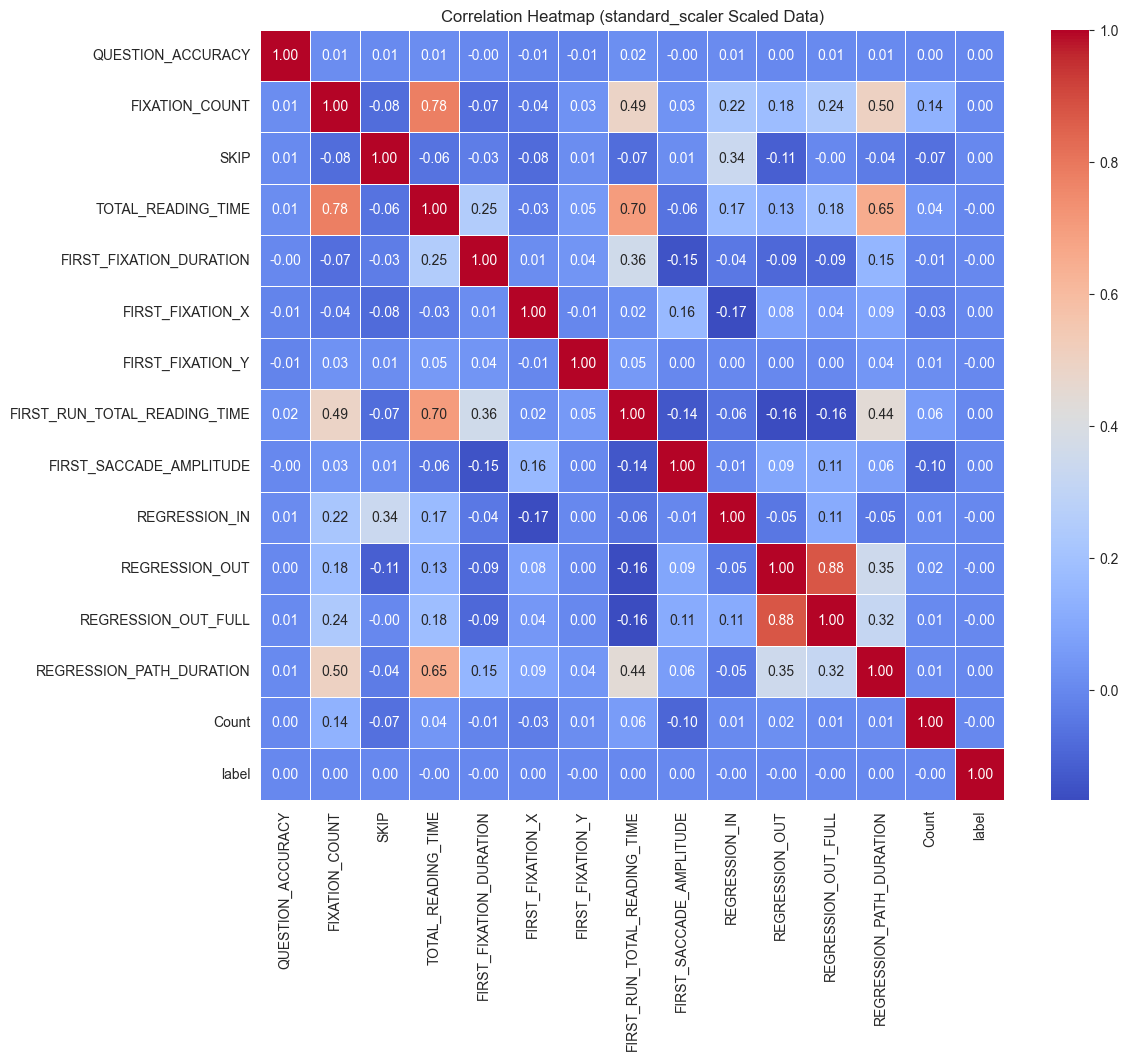

In [49]:
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 질병인과 정상인에 대한 레이블 생성
disease_df['label'] = 1
normal_df['label'] = 0

# 합쳐진 Min-Max 스케일링된 데이터
data = pd.concat([disease_df, normal_df], axis=0)

# 피처 간의 상관관계 계산
correlation = data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (standard_scaler Scaled Data)')
plt.show()

In [50]:
data

QUESTION_ACCURACY  FIXATION_COUNT  \
SubjectID   Sentence_ID Word_Number                                      
ake05       -1.638298   -1.362834             1.577899       -0.055102   
                        -0.867247             1.577899       -0.607482   
                        -0.371661             1.577899       -0.331292   
                         0.123926             1.577899        1.325846   
                         0.619513             1.577899       -0.883671   
...                                                ...             ...   
varya_norm1  1.625977    0.091515             1.539928       -0.734257   
                         0.596728             1.539928       -0.067213   
             1.742604   -0.918909            -0.677818       -0.400735   
                        -0.413697            -0.677818        0.933355   
                         0.091515            -0.677818        0.599832   

                                         SKIP  TOTAL_READING_TIME  \
SubjectID   Sentence_ID Word_Number                                 
ake05       -1.638298   -1.362834   -0.241202           -0.091648   
                        -0.867247   -0.241202           -0.602507   
                        -0.371661   -0.241202            0.429200   
                         0.123926   -0.241202            2.316382   
                         0.619513   -0.241202           -0.585384   
...                                       ...                 ...   
varya_norm1  1.625977    0.091515   -0.228606           -0.640644   
                         0.596728   -0.228606            0.703947   
             1.742604   -0.918909   -0.228606            0.353587   
                        -0.413697   -0.228606            2.101904   
                         0.091515   -0.228606            0.520646   

                                     FIRST_FIXATION_DURATION  \
SubjectID   Sentence_ID Word_Number                            
ake05       -1.638298   -1.362834                   0.472962   
                        -0.867247                  -0.582148   
                        -0.371661                   3.682666   
                         0.123926                   2.065488   
                         0.619513                   1.182943   
...                                                      ...   
varya_norm1  1.625977    0.091515                  -0.116568   
                         0.596728                   1.598152   
             1.742604   -0.918909                   1.877157   
                        -0.413697                   4.341704   
                         0.091515                   1.743467   

                                     FIRST_FIXATION_X  FIRST_FIXATION_Y  \
SubjectID   Sentence_ID Word_Number                                       
ake05       -1.638298   -1.362834           -1.601718          1.605918   
                        -0.867247           -1.338113          1.528236   
                        -0.371661           -1.049472          1.455732   
                         0.123926           -0.494364          1.580024   
                         0.619513            0.352246          1.709495   
...                                               ...               ...   
varya_norm1  1.625977    0.091515            0.329812          0.825680   
                         0.596728            0.416675          0.968621   
             1.742604   -0.918909           -0.857673          0.063330   
                        -0.413697           -0.520356         -0.250345   
                         0.091515            0.263941         -0.214610   

                                     FIRST_RUN_TOTAL_READING_TIME  \
SubjectID   Sentence_ID Word_Number                                 
ake05       -1.638298   -1.362834                       -0.530104   
                        -0.867247                       -0.741945   
                        -0.371661                        1.020094   
                      

In [51]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
data = data.drop(columns=['SKIP', 'FIRST_FIXATION_X', 'REGRESSION_OUT', 'REGRESSION_OUT_FULL'])

X = data.drop('label', axis=1)
y = data['label']

# 데이터를 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 학습 데이터에 대해 스케일링 수행
X_train_scaled = standard_scaler.fit_transform(X_train)

# 테스트 데이터에 대해 학습 데이터의 스케일을 그대로 적용
X_test_scaled = standard_scaler.transform(X_test)

In [52]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(knn_classifier, X, y, cv=k_fold, scoring='accuracy')

# 각 폴드의 정확도 출력
print("각 폴드의 정확도:", cross_val_results)

# 평균 정확도 계산
mean_accuracy = np.mean(cross_val_results)
print("평균 정확도:", mean_accuracy)

각 폴드의 정확도: [0.77957413 0.77807355 0.78763679 0.78280588 0.78300306]
평균 정확도: 0.7822186813737062


In [55]:
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7795741324921136


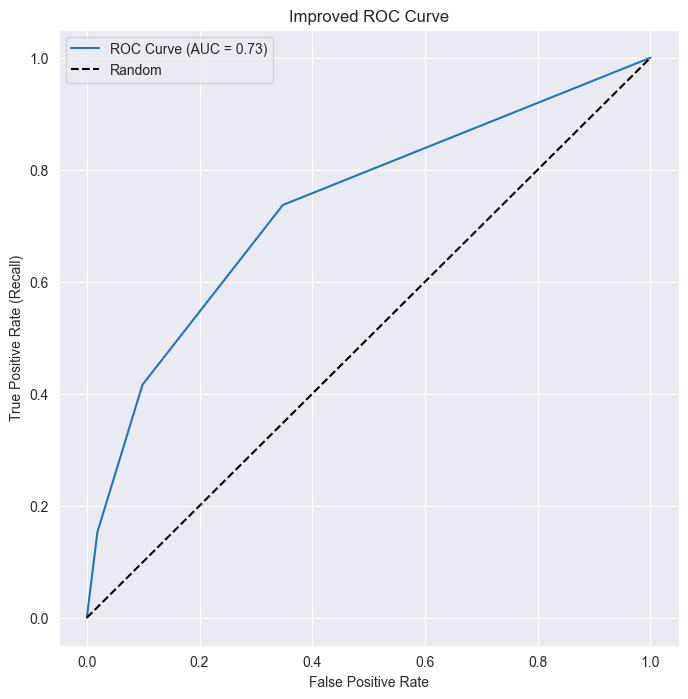

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측 확률 얻기 (다중 클래스 문제이므로 predict_proba 사용)
y_probs = knn_classifier.predict_proba(X_test_scaled)

# ROC curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 클래스 1에 대한 확률을 사용

# ROC AUC 값 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Improved ROC Curve')
plt.legend()
plt.show()


In [57]:
print(roc_auc)

0.734226443645875


AUC의 해석은 다음과 같습니다:

AUC = 0.5: 모델이 무작위로 예측하는 경우와 같음 (성능이 나쁨)
0.5 < AUC < 1.0: 모델이 얼마나 잘 분류되는지에 대한 정도를 나타냄
AUC가 1에 가까울수록 좋은 성능을 나타냄
AUC가 0.5보다 크면 모델이 양성 및 음성 샘플을 잘 분류하고 있음
AUC가 0.7 이상이면 어느 정도 좋은 모델로 간주될 수 있음
AUC가 0.8 이상이면 매우 좋은 모델로 간주될 수 있음
AUC가 0.9 이상이면 우수한 모델로 간주될 수 있음

이진 분류에서 클래스 간의 불균형이나 모델의 예측이 매우 확신적으로 이루어질 때 나타날 수 있습니다.
